# App Rating

**Project's Goals:**

In this project, I analyze the ranking of applications in the Google Play store.
My goal throughout the project will be to identify patterns and characteristics that influence an application's rating level. Following that, I will try to predict the rating level of the app using these patterns. 

The results of the project can be used to predict which apps are more likely to succeed in the real world.
 App developers and entrepreneurs can use this information to create successful apps, as well as investors to determine which apps are worth investing in.

**Project field** - mobile application.


**research questions**

Is there a difference in rating levels between the categories of the app?

Are downloads and reviews of an application indicative of its level of satisfaction?

Do free apps get higher ratings than paid apps?

Does the app rating increase over the years?

Do apps aimed at young people get a different rating than apps aimed at adults?


**Database:**

The data was collected from the Google App Store.

There are more than 8,000 views of different apps.

**Description of the variables:**

* App - Application name
* Category - Category the app belongs to
* Rating - Overall user rating of the app 
* Reviews - Number of user reviews for the app 
* Size - Size of the app 
* Intalls - Number of user downloads/installs for the app 
* Type - Paid or Free
* Price - Price of the app 
* Content Rating - Age group the app is targeted at 
* Geners - An app can belong to multiple genres (apart from its main category).
* Last Update - last update date of release 
* Current Ver - current app version
* Android Ver - device’s android version the app compatible with



## Importing

importing packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#%autosave 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',               
        palette="deep",                  
        font_scale=1.1,                  
        rc={"figure.figsize": [12, 7.5]})
import scipy.stats as stats
from datetime import datetime
from dateutil import parser
from pandas_datareader import data
#from google.colab import files

importing data

In [ ]:
data = pd.read_csv('googleplaystore.csv')

Sample from the data

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Cleaning Data

first look on the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The first thing is to clean the data in order to avoid distortions in the analysis of the observations.

Drop duplicate values and null values.

In [ ]:
data = data.drop_duplicates()
data = data.dropna()

Updated information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


We have a large enough number of data so we can move on.

# Exploratory Data Analysis

In this section I explore the dataset.
The following two objectives will guide my exploration of this dataset:

Understand the individual variables in the dataset, and how the variables in this dataset relate to the application rating.

Get list of numerical variables

In [ ]:
print(list(data.select_dtypes('number').columns))

['Rating']


Get list of categorical variables

In [ ]:
print(list(data.select_dtypes('object').columns))

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Given the large number of categories and the wide distribution of many of the categories I will have to choose only some of them. It can be seen that the 'App' category can be waived, because the app's name doesn't affect on the rank, and I guess that applies to the version and size as well. We can also refer to categories 'Price' and 'Type' as equivalent for our needs. For the same reason I will refer only to the category 'Category' insted of refering both 'Category' and 'Genres'.

In [ ]:
categorical = ['Category', 'Reviews', 'Installs', 'Type', 'Content Rating', 'Last Updated'] 
len(categorical)

6

It can be seen that all the variables, except one, are categorical - nominal or ordinal.
Therefore I can only use certain types of visualizations such as bar plots, box plots and scatter plots.

Our goal is understand how the variables in this dataset relate to the apps rank.

now let's look at the rating info

In [ ]:
data['Rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
mean_rate = data['Rating'].mean()
std_rate = data['Rating'].std()/np.sqrt(data.shape[0])
stats.norm.interval(0.95, loc=mean_rate, scale=std_rate)

(4.1770962979503, 4.19882087513095)

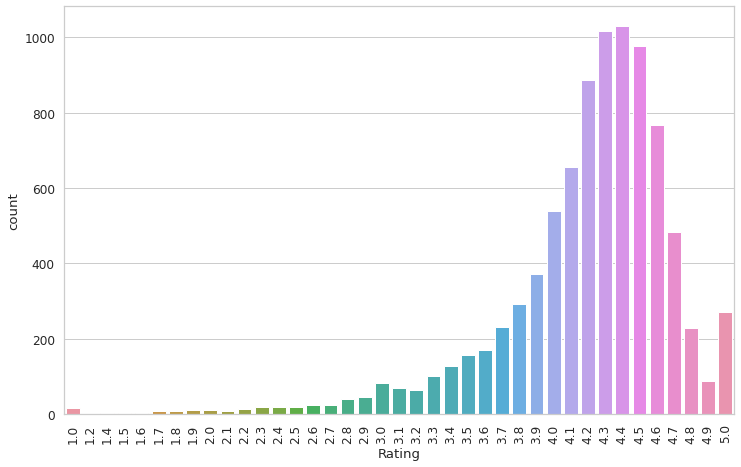

In [ ]:
ax = sns.countplot(data['Rating'])
for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

We can see that the distribution of the rating is around four - a relatively high rating. This will make it difficult for us to see clear trends.

We will now look at the other distributions of the categories we have selected.

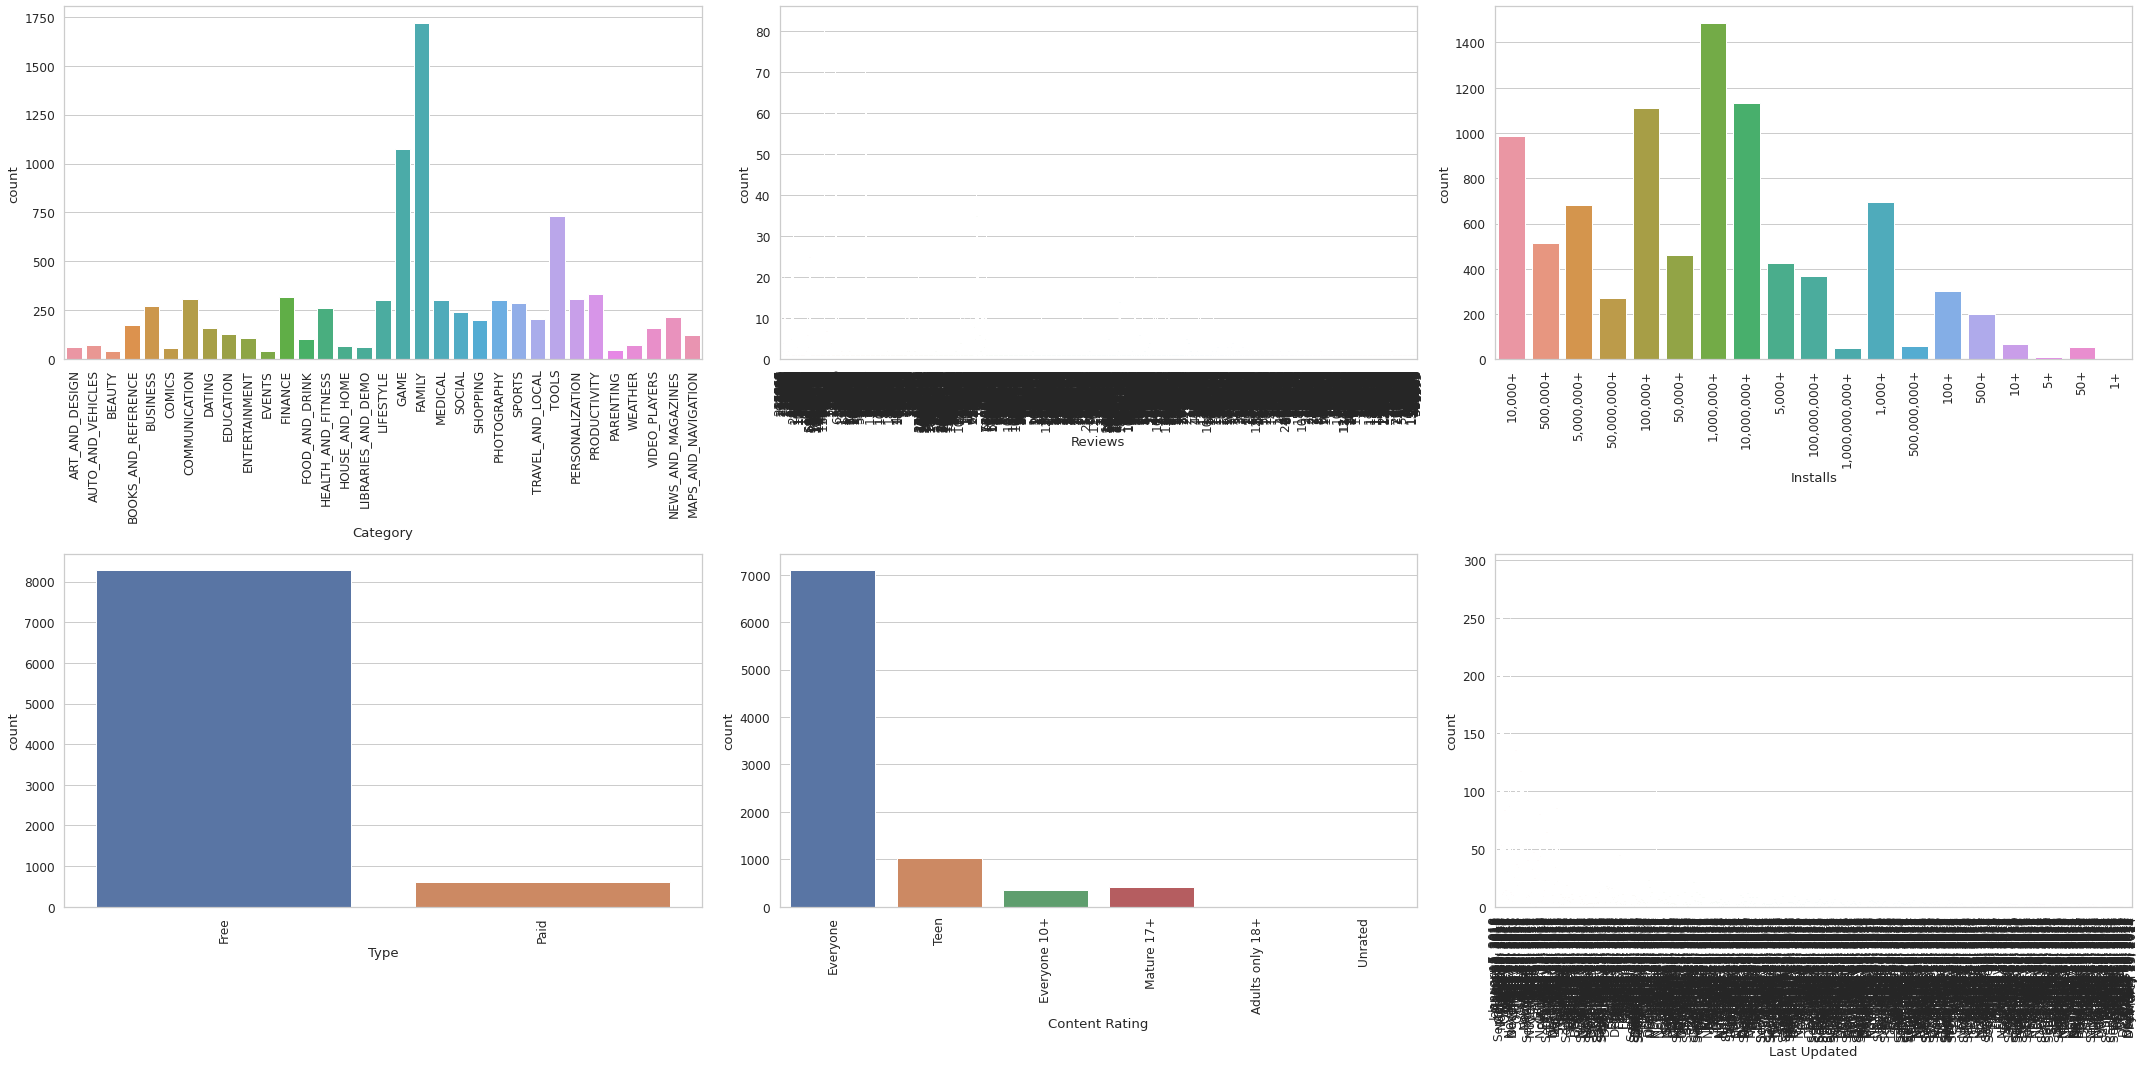

In [ ]:
# Plot categorical variables using matplotlib + seaborn
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#ax[-1,-1].axis('off')

fig.tight_layout()
plt.show()

It can be seen that the data are very unclear. Therefore we will need to change and adjust the values.

Let's start with the 'Reviwes' category.

In [ ]:
data['Reviews'].value_counts()

2          82
3          76
4          74
5          74
1          67
           ..
55427       1
3157936     1
527247      1
240475      1
398307      1
Name: Reviews, Length: 5990, dtype: int64

We can see that there are very many types of entries in this category. We must therefore divide the values into a limited number of classes, so that a much clearer picture appears.

Because these are numeric values we can select classes according to the amount of reviwes. 

In [ ]:
# Sort each value by classes in selected scales
def reviewsLevel(num):
    num = int(num)
    if num < 100:
      return 'less than 100'
    if num < 1000:
      return '100-1K'
    if num > 1000 and num < 10000:
      return '1K-10K'
    if num > 10000 and num < 100000:
      return '10K-100K'
    return 'over 100K'

Create a new row named 'reviews level' according to this classification.

In [ ]:
reviews = []
for r in data['Reviews']:
  reviews.append(reviewsLevel(r))
reviews = np.array(reviews)
data['Reviews Level'] = pd.Series(data=reviews, index= data.index)

data['Reviews Level'].head()

0       100-1K
1       100-1K
2     10K-100K
3    over 100K
4       100-1K
Name: Reviews Level, dtype: object

In [ ]:
data['Reviews Level'].value_counts()

over 100K        1971
10K-100K         1957
less than 100    1898
1K-10K           1555
100-1K           1505
Name: Reviews Level, dtype: int64

We got a limited number of classes and in each class a large enough number of values.

We will move on to the following variable - 'Installs'. 

We encountered exactly the same problem, so here too we will use the same transformation technique.

In [ ]:
data['Installs'].value_counts()

1,000,000+        1485
10,000,000+       1132
100,000+          1110
10,000+            988
1,000+             697
5,000,000+         683
500,000+           515
50,000+            461
5,000+             425
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: Installs, dtype: int64

We will use the numerical nature of the variables to divide into classes.

In [ ]:
# Sort each value by classes in selected scales
def installLevel(num):
  if num == '0':
    num = 0
  else:
      num = int(num[:-1].replace(',','')) # get the numeric part of the value
  if num < 100000:
    return 'less than 100K'
    #return '10K-100K'
  if num < 1000000:
    return '100K-1M'
  if num < 10000000:
    return '1M-10M'
  #if num < 100000000:
   # return '10M-100M'
  return 'over 10M'

Create a new row named 'installs level' according to this classification.

In [ ]:
installs = []
for r in data['Installs']:
  installs.append(installLevel(r))
installs = np.array(installs)
data['Installs Level'] = pd.Series(data=installs, index= data.index)

data['Installs Level'].head()

0    less than 100K
1           100K-1M
2            1M-10M
3          over 10M
4           100K-1M
Name: Installs Level, dtype: object

In [ ]:
data['Installs Level'].value_counts()

less than 100K    3210
1M-10M            2168
over 10M          1883
100K-1M           1625
Name: Installs Level, dtype: int64

We got a limited number of classes and in each class a large enough number of values.

We will move on to the next category - 'Last Update'.

In [ ]:
data['Last Updated'].value_counts()

August 3, 2018      291
July 31, 2018       254
August 2, 2018      250
August 1, 2018      247
July 30, 2018       183
                   ... 
April 17, 2014        1
April 11, 2016        1
October 27, 2015      1
August 31, 2015       1
March 23, 2014        1
Name: Last Updated, Length: 1299, dtype: int64

I decided that here I would sort the data by year of updating.

Create a new row named 'Updated Year' according to the classification I chose.

In [ ]:
years = []
for y in data['Last Updated']:
  years.append(int(y[-4:])) #get the updated year
years = np.array(years)

data['Updated Year'] = pd.Series(data=years, index= data.index)
data['Updated Year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Updated Year, dtype: int64

In [ ]:
data['Updated Year'].value_counts()

2018    6095
2017    1457
2016     638
2015     383
2014     185
2013      91
2012      21
2011      15
2010       1
Name: Updated Year, dtype: int64

There are only one rating value on 2010, so I will drop it.

In [ ]:
data = data.drop(index = data[data['Updated Year'] == 2010].index[0])

For the purpose of the study, let's assume that the date of the last update indicates the period in which the application is in use and receives its rating.

There are several overlapping values in 'Category Rating', we will combine them to get a clearer picture of the data distribution.

In [ ]:
data['Content Rating'].value_counts()

Everyone           7088
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

It is possible to unite 'Adults 18+' together with 'Mature 17+' as well as 'Everyone 10+' together with 'Everyone' because the groups are, more or less, included in each other.

It is not accurate, but for our goals it is sufficient, since we are interested in the age of the raters. 
We assume for that matter that the age of the raters matches the target audience of the application.

In [ ]:
data['Content Rating'] = data['Content Rating'].map({'Everyone':'Everyone', 'Everyone 10+':'Everyone', 'Mature 17+':'Mature 17+', 'Adults only 18+':'Mature 17+', 'Teen':'Teen', 'Unrated':'Unrated'})

The value 'Unrated' are a single so I will drop it

In [ ]:
data = data.drop(index = data[data['Content Rating'] == 'Unrated'].index[0])

The new values are:

In [ ]:
data['Content Rating'].value_counts()

Everyone      7448
Teen          1022
Mature 17+     414
Name: Content Rating, dtype: int64

Our new categories will be:

In [ ]:
categorical = ['Category', 'Installs Level', 'Type', 'Content Rating', 'Reviews Level', 'Updated Year'] 
len(categorical)

6

Now let's look at the new bar plot we received:

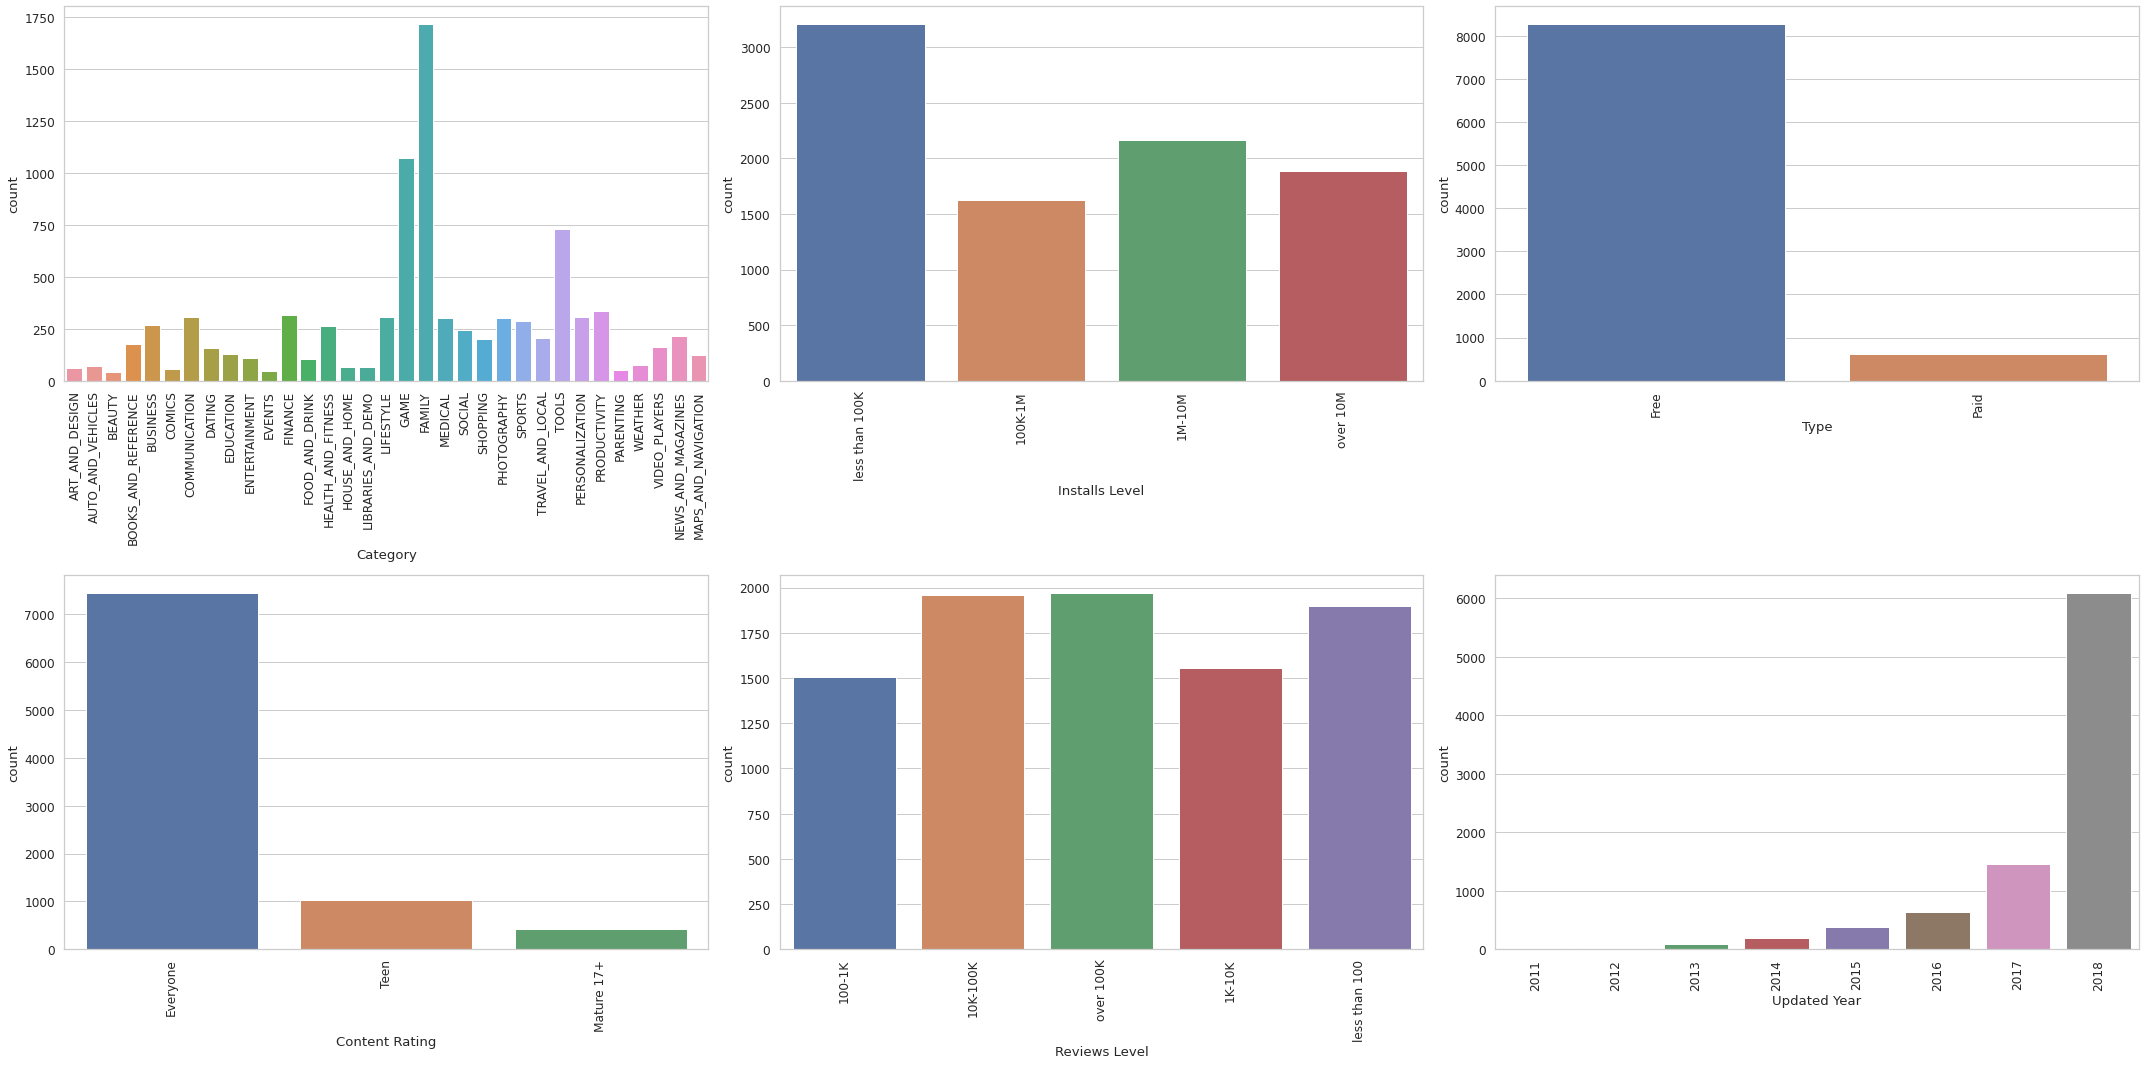

In [ ]:
# Plot categorical variables using matplotlib + seaborn
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#ax[-1,-1].axis('off')

fig.tight_layout()
plt.show()

Now it looks much better.

In [ ]:
#categorical = ['Category', 'Reviews Level', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres', 'Last Updated'] 

# Box Plot

We can use a box plot to visualize the relationship between the categorical variables in our dataset and the Rating of the application.

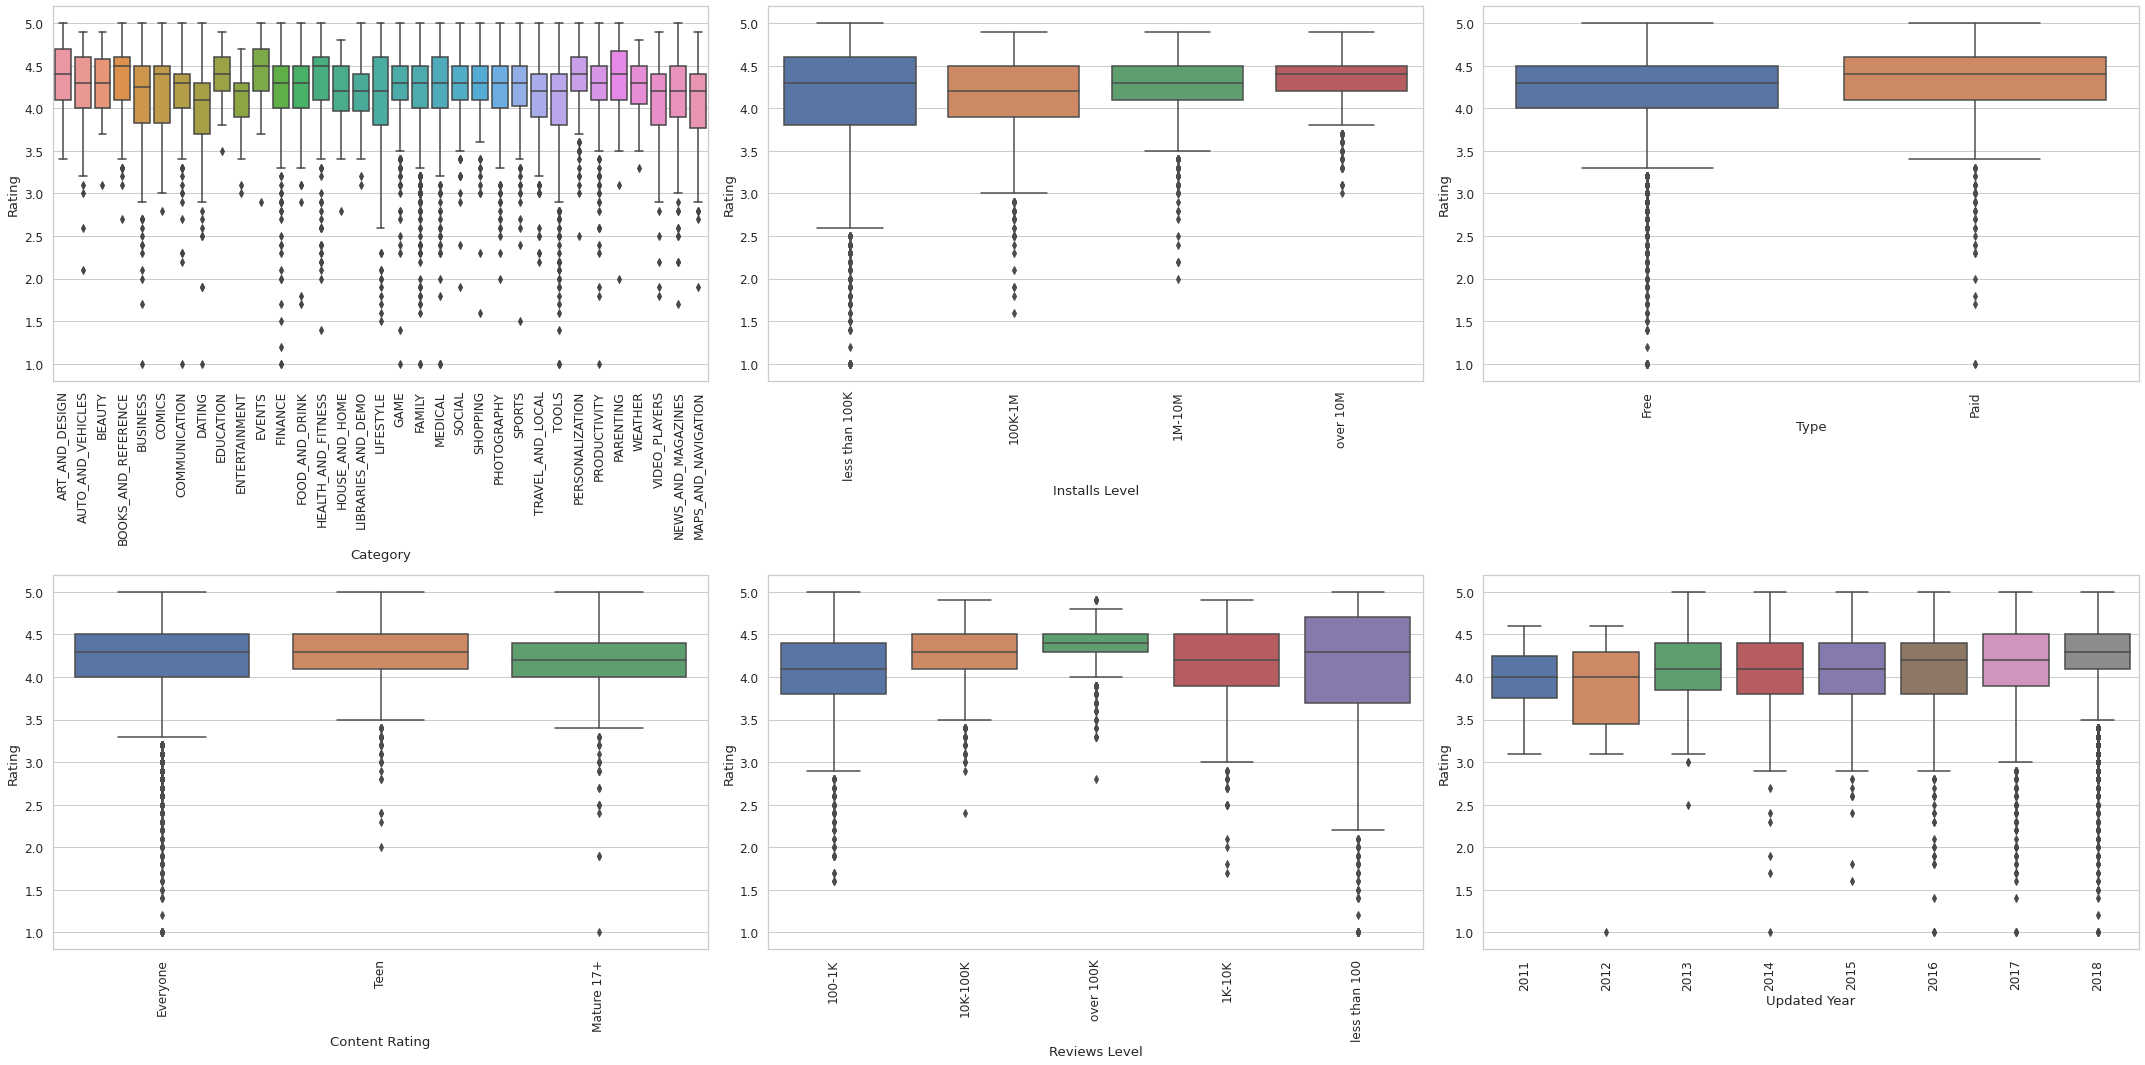

In [ ]:
# Plot categorical variables using matplotlib + seaborn
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(data[variable], data['Rating'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#ax[-1,-1].axis('off')

fig.tight_layout()
plt.show()

Let’s take a closer look at the Category variable. We see that there is definitely a different distribution for different categories, but the visualization is a bit difficult to decipher. 
Let’s sort our box plots by lowest rate category to highest one.

In [ ]:
sorted_nb = data.groupby(['Category'])['Rating'].median().sort_values()
print(sorted_nb)

Category
DATING                 4.10
HOUSE_AND_HOME         4.20
LIFESTYLE              4.20
MAPS_AND_NAVIGATION    4.20
NEWS_AND_MAGAZINES     4.20
ENTERTAINMENT          4.20
LIBRARIES_AND_DEMO     4.20
VIDEO_PLAYERS          4.20
TOOLS                  4.20
TRAVEL_AND_LOCAL       4.20
BUSINESS               4.25
SOCIAL                 4.30
PHOTOGRAPHY            4.30
SPORTS                 4.30
MEDICAL                4.30
SHOPPING               4.30
PRODUCTIVITY           4.30
WEATHER                4.30
GAME                   4.30
FOOD_AND_DRINK         4.30
FINANCE                4.30
FAMILY                 4.30
COMMUNICATION          4.30
BEAUTY                 4.30
AUTO_AND_VEHICLES      4.30
PARENTING              4.40
PERSONALIZATION        4.40
EDUCATION              4.40
COMICS                 4.40
ART_AND_DESIGN         4.40
EVENTS                 4.50
BOOKS_AND_REFERENCE    4.50
HEALTH_AND_FITNESS     4.50
Name: Rating, dtype: float64


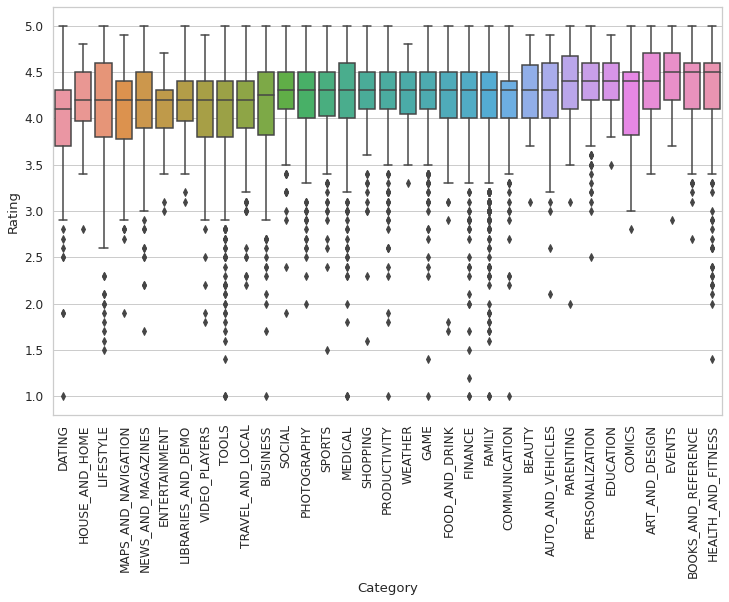

In [ ]:
sns.boxplot(x=data['Category'], y=data['Rating'], order=list(sorted_nb.index))
plt.xticks(rotation=90)
plt.show()

In all the categories we searched it can be seen that the change in the average rating is relatively minor. However, differences can still be seen.

* There is a certain correlation between the year of last update and the rating, the later the year the rating increases.

* There is a similar correlation between the number of reviews and the average rating, the higher the number of reviews the higher the rating.

* On average, apps that cost money get a higher rating (of course the low number of these apps affects accuracy).

* There is a certain correlation between the amount of installations and the height of the rating.

* It can be seen that adults rank lower than teenagers, in average.
Also, the fact that the 'Everyone' variable has an average almost identical to the 'Teen' variable can indicate that most of the people that rating the 'everyone' category are teenagers.

* The categories that received the highest rating average are: 'HEALTH_AND_FITNESS', 'BOOKS_AND_REFERENCES' and 'EVENTS'.

* The categories that received the lowest rating average: 'DATING', 'HOUSE_AND_HOME', 'LIFESTYLE' and 'MAPS_AND_NAVIGATION'.

Note: Due to the wide dispersion between the medians of the various categories and the small difference between them, the app's category probably does not really have an effect on the level of rating it receives.

# Hypothesis testing

At this stage we will check if our hypotheses regarding the relationship between the type of application, the amount of installs and reviews, the year of its update and the user age with the level of rating it receives are correct.

For each hypothesis we will state the null hypothesis and our hypothesis and test the correctness of our hypothesis using statistical tests.

I decided not to measure category statistics since the variables do not match.

First of all, we will create a new variable: "Binary Rating'

We will define any score below 4 as a low score and any score above 4 as a high score.

In [ ]:
data['Binary Rating'] = data['Rating'] > 4
data['Binary Rating'] = data['Binary Rating'].map({False: 'Low', True: 'High'})
data['Binary Rating'].head()

0    High
1     Low
2    High
3    High
4    High
Name: Binary Rating, dtype: object

The rating proportion is:

In [ ]:
from locale import normalize
(data['Rating'] > 4).value_counts(normalize = True)

True     0.720621
False    0.279379
Name: Rating, dtype: float64

That is about 72% of the applications received a high rating and only 28% received a low rating.

Let's start by testing the hypothesis regarding the effect of the app's price on the rating:
- H0 -  There is no difference between the average app rating of free apps and paid apps
- H1 - Paid apps are rated higher on average.

Significance level: 0.05

In [ ]:
type_rating_table = pd.crosstab(data['Binary Rating'], data['Type'])
type_rating_table

Type,Free,Paid
Binary Rating,,
High,5929,473
Low,2344,138


Because there are very problematic proportions between the number of paid apps and the number of free apps, I will refer to the results with limited liability.

In [ ]:
data['Type'].value_counts(normalize=True)['Paid']

0.06877532642953625

I can calculate the proportions for each group simply by dividing the number of apps with high rating by the total number of apps in the same group:

I built a function that will do the job:

In [ ]:
def prop(col1,col2,table):
  first_prop = table[col1]['High'] / table[col1].sum()
  sec_prop = table[col2]['High'] / table[col2].sum()

  print('Proportion of ' +col1+ f' with high rating: {first_prop}')
  print('Proportion of ' +col2+ f'  with high rating: {sec_prop}')

The results for app's type will be:

In [ ]:
prop('Paid','Free',type_rating_table)

Proportion of Paid with high rating: 0.7741407528641571
Proportion of Free  with high rating: 0.7166686812522665


There is only a slight difference between free apps and paid apps..
We will also test this using a chi-squared test.

In [ ]:
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(type_rating_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 9.051601541037858
p-value: 0.002624648086929903
Degs of freedom: 1
Expected frequencies: [[5961.7003602  440.2996398]
 [2311.2996398  170.7003602]]


The pValue are lower than 0.05 so we will reject the null hypothesis.

Now we will define apps whose last update was released until 2015 as old apps, and apps that were updated in later years as new apps.

In [ ]:
data['Binary Age'] = data['Updated Year'] > 2015
data['Binary Age'] = data['Binary Age'].map({False: 'previouse', True: 'recent'})
data['Binary Age'].head()

0    recent
1    recent
2    recent
3    recent
4    recent
Name: Binary Age, dtype: object

We will now examine the relationship between the rating of applications in recent years and the level of the rating in earlier years.
- H0 - There is no difference in the level of rating that applications receive in recent years and in previous years.
- H1 - Today the applications receive a higher rating.

Significance level: 0.05

In [ ]:
year_rating_table = pd.crosstab(data['Binary Rating'], data['Binary Age'])
year_rating_table

Binary Age,previouse,recent
Binary Rating,,
High,392,6010
Low,302,2180


We can already see from the table that the ratio between low and high rating in old apps is smaller than in new apps.

Therefore I will treat the results with skepticism because of the disproportion in the data between old and new apps.

Calculation of the proportions for each group:

In [ ]:
prop('previouse','recent',year_rating_table)

Proportion of previouse with high rating: 0.5648414985590778
Proportion of recent  with high rating: 0.7338217338217338


It can be seen that indeed new applications receive a higher rating.
We will also test this using a chi-squared test

In [ ]:
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(year_rating_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 89.90417689641106
p-value: 2.499787060170689e-21
Degs of freedom: 1
Expected frequencies: [[ 500.11121117 5901.88878883]
 [ 193.88878883 2288.11121117]]


The pValue are lower than 0.05 so we will reject the null hypothesis.

The first step is converting the values in 'Reviews' to numeric variables.

In [ ]:
reviews = []
for r in data['Reviews']:
  reviews.append(int(r))
reviews = np.array(reviews)
data['Reviews'] = pd.Series(data=reviews, index= data.index)

data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [ ]:
pd.crosstab(data['Binary Rating'], data['Reviews Level'])

Reviews Level,100-1K,10K-100K,1K-10K,less than 100,over 100K
Binary Rating,,,,,
High,871,1517,1030,1163,1821
Low,634,440,523,735,150


Next we will look at the number of reviews level. Here too, we will classify into two categories, over 10K and under 10K. 
We will put the new division under a new variable named 'Binary Reviews'.

In [ ]:
data['Binary Review'] = data['Reviews'] > 10000
data['Binary Review'] = data['Binary Review'].map({False: 'less than 10K', True: 'over 10K'})
data['Binary Review'].head()

0    less than 10K
1    less than 10K
2         over 10K
3         over 10K
4    less than 10K
Name: Binary Review, dtype: object

We will now examine the relationship between the number of reviews and the rating level.

H0 - The number of reviews has no effect on the rating height.

H1 -There is a direct correlation between the number of reviews and the rating.

Significance level: 0.05

In [ ]:
review_rating_table = pd.crosstab(data['Binary Rating'], data['Binary Review'])
review_rating_table

Binary Review,less than 10K,over 10K
Binary Rating,,
High,3064,3338
Low,1892,590


Statistic tests:

Calculation of the proportions for each group:

In [ ]:
prop('less than 10K','over 10K',review_rating_table)

Proportion of less than 10K with high rating: 0.6182405165456013
Proportion of over 10K  with high rating: 0.84979633401222


It can be seen that big number of reviews receive a higher rating.

We will also test this using a chi-squared test

In [ ]:
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(review_rating_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 582.4369623342111
p-value: 1.1066077857332409e-128
Degs of freedom: 1
Expected frequencies: [[3571.39936965 2830.60063035]
 [1384.60063035 1097.39936965]]


The pValue are much lower than 0.05 so we will reject the null hypothesis. The amount of reviews is an indication of the level of the rating.

now we will converting the values in 'Installs' to ordinal variables.

In [ ]:
installs = []
for r in data['Installs']:
  installs.append(int(r[:-1].replace(',','')))
installs = np.array(installs)
data['Installs'] = pd.Series(data=installs, index= data.index)

data['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [ ]:
pd.crosstab(data['Binary Rating'], data['Installs Level'])

Installs Level,100K-1M,1M-10M,less than 100K,over 10M
Binary Rating,,,,
High,1067,1650,2017,1668
Low,557,518,1192,215


Next we will look at the number of installs level. Here too, we will classify into two categories, over one million and under one million.
We will put the new division under a new variable named 'Binary Install'.

In [ ]:
data['Binary Install'] = data['Installs'] >= 1000000
data['Binary Install'] = data['Binary Install'].map({False: 'less than 1 million', True: 'over 1 million'})
data['Binary Install'].head()

0    less than 1 million
1    less than 1 million
2         over 1 million
3         over 1 million
4    less than 1 million
Name: Binary Install, dtype: object

We will now examine the relationship between the number of installs and the rating level.

H0 - The number of installs has no effect on the rating height.

H1 -There is a direct correlation between the number of installations and the rating.

Significance level: 0.05

In [ ]:
install_rating_table = pd.crosstab(data['Binary Rating'], data['Binary Install'])
install_rating_table

Binary Install,less than 1 million,over 1 million
Binary Rating,,
High,3084,3318
Low,1749,733


As shown in the table. 
In apps with less than 1 million downloads, low ratings are about three times more common than in apps with more than 1 million downloads, while high ratings are similar.

Calculating the proportions:

In [ ]:
prop('less than 1 million','over 1 million',install_rating_table)

Proportion of less than 1 million with high rating: 0.638112973308504
Proportion of over 1 million  with high rating: 0.8190570229572945


It can be seen that applications with over 1 million installs get a higher rating from other apps.

We will test this using a chi-squared test

In [ ]:
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(install_rating_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 357.4941712231381
p-value: 9.890680942286124e-80
Degs of freedom: 1
Expected frequencies: [[3482.76294462 2919.23705538]
 [1350.23705538 1131.76294462]]


The pValue are much lower than 0.05 so we will reject the null hypothesis. That is, the amount of installations is indeed an indication of the level of the rating.

In order to check the effect of the age of the users on the level of the rating, we will refer only to 'Teen' and 'Mature 17+' values.

In [ ]:
pd.crosstab(data['Binary Rating'], data['Content Rating'])

Content Rating,Everyone,Mature 17+,Teen
Binary Rating,,,
High,5356,278,768
Low,2092,136,254


We will create a new category called 'Rating Age' and use it for the calculations. In this category only the values we mentioned above are referred to.

In [ ]:
data['Rating Age'] = data['Content Rating']
data['Rating Age'] = data['Rating Age'].map({'Teen':'Teen', 'Mature 17+':'Mature'})
data['Rating Age'].head()

0     NaN
1     NaN
2     NaN
3    Teen
4     NaN
Name: Rating Age, dtype: object

We will now examine the relationship between the number of reviews and the rating level.

H0 - The number of reviews has no effect on the rating height.

H1 -There is a direct correlation between the number of reviews and the rating.

Significance level: 0.05

In [ ]:
age_rating_table = pd.crosstab(data['Binary Rating'], data['Rating Age'])
age_rating_table

Rating Age,Mature,Teen
Binary Rating,,
High,278,768
Low,136,254


As we can see from the table, low rating to high rating proportion for teens looks like 2:7, while for Matures, the proportion is 1:2.

I can calculate the proportions for each group simply by dividing the number of apps with high rating by the total number of apps in the same group:

In [ ]:
prop('Teen','Mature',age_rating_table)

Proportion of Teen with high rating: 0.7514677103718199
Proportion of Mature  with high rating: 0.6714975845410628


It can be seen that teen tend to score application higher than mature.

The chi-squared test:

In [ ]:
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(age_rating_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 9.12504710525999
p-value: 0.0025213339298929653
Degs of freedom: 1
Expected frequencies: [[301.56267409 744.43732591]
 [112.43732591 277.56267409]]


The pValue are lower than 0.05 so we will reject the null hypothesis. That mean teenage users tend to give higher rating than matures.

 
Statistical tests are suitable for all hypotheses we have presented. 
- An app is more likely to score higher if it has a high number of users and reviews.
- On average, newer apps are rated higher than older ones.
- There is a tendency for young users to give higher ratings than older users.
- On average, paid apps are rated higher than free ones.
 

There can be several hypotheses regarding the causes of these correlations, including:
- A good app attracts more users
- In the past, people bothered to rate the apps less
- Over time, apps began coaxing satisfied users into rating them
- There is a tendency for people not to pay for apps before they are sure of their quality


# Random Forest

At this part we will use predication methods.

Because there are not enough numerical values in the database, I chose to use the random forest method.

The Random Forest method is able to handle categorical variables very well.

Importing the random forest method:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)   # setting random seed for reproducibility

Converting the nominal values to ordinal values.

In [ ]:
data['Type'] = data['Type'].map({'Free':0, 'Paid':1})

In [ ]:
data['Binary Rating'] = data['Binary Rating'].map({'High': 1, 'Low': 0})

Prepering the feature values and the target values of the prediction. 
Based on the features, the model will attempt to predict the target (rating).

In [ ]:
features = ['Updated Year','Installs', 'Type', 'Reviews']
x = data[features].values
y = data['Binary Rating'].values

Train random forest model.

In [ ]:
ratingClassifierRF = RandomForestClassifier(n_estimators=10)
ratingClassifierRF.fit(x,y)

RandomForestClassifier(n_estimators=10)

Now we will add a new column to the database which will contain the prediction of the model.

Next, we will examine its predictability using a cross table.

In [ ]:
data['predictions_rf'] = ratingClassifierRF.predict(x)
#np.count_nonzero(data['predictions_rf'] == 0)
# Create confusion matrix
conf_matrix = pd.crosstab(data['predictions_rf'], data['Binary Rating'], normalize=True)
conf_matrix

Binary Rating,0,1
predictions_rf,,
0,0.243134,0.034219
1,0.036245,0.686403


Predation has a 95% success rate, as you can see.
Our prediction of whether an application will receive a high score or a low score was successful since about 28% of the scores were low.

# Conclusions

**final results:**

Data collected revealed that there is correlation between the ranking of the apps and most of the variables I examined - type,number of downloads, etc. The category of the app, on the other hand, probably doesn't affect the app's rating much.

Additionally, we found that the distribution of ratings for the apps is positively asymmetric, with a small standard deviation and a high average.

In addition, I saw that it is possible to use prediction models to predict whether an application received a high score - obove 4 - or a low score - under 4.

Therefore, only one prediction model was likely to accurately predict whether the application would receive a high or low rating.

**conclusion:**

Also, the study shows that it is indeed possible to predict whether any application will receive a high or low rating.
The parameters according to which we will assume that the application will receive a high rating are: a high amount of downloads and reviews, a new application, the application is intended for youth and is paid.

Any combination of these parameters will be an indication of a high rating.

**Research questions and analyses for future studies**

Throughout my work I have been bothered by the fact that there is such a small amount of low rating so I would like to look into this.

I propose the following research questions:

- Why most of the apps get such a high rating?
- Is it because people who don't like a certain app just delete it and don't bother to rate it?
- How relevant is the rating in the app store and does it tell us anything about the app's quality?
